Chelsea Zackey

CIS 5526

10/22/2020

# Homework 4: Classification using sklearn  

The objective of this homework is to gain experience with using sklearn, a versatile Python toolbox for machine learning. The following code is copied from http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py. You should be able to run the code without error messages.

In [2]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


h = .02  # step size in the mesh
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]
#    GaussianNB(),
#    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]


figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

/Users/edenzackey/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/edenzackey/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/edenzackey/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<Figure size 2700x900 with 24 Axes>

The code above trained several types of classifiers on 3 synthetic data sets. Among them are kNN and feedforward neural networks. There are also some other algorithms we will introduce during the course. At the moment, you do not have to worry what they are and how they work. 

**Question 1**. Study the code and try to understand what each line does. In particular, pay attention to how easy it is to train predictors of different types. Run the code. You should be able to see a nice display demonstrating performance of different algorithms on 3 data sets.

**Question 2**. Train all the listed classifiers on Iris data (you can load it using *iris = sklearn.datasets.load_iris()*) and test their accuracy. Report and discuss the results. 

**Soln. 2**: Below we provide an example of a bar graph demonstrating the measured accuracy for each classifier in predicting a single training & testing instance of the Iris dataset on all features, with a test size of 40% of the data as used in the prior code. 
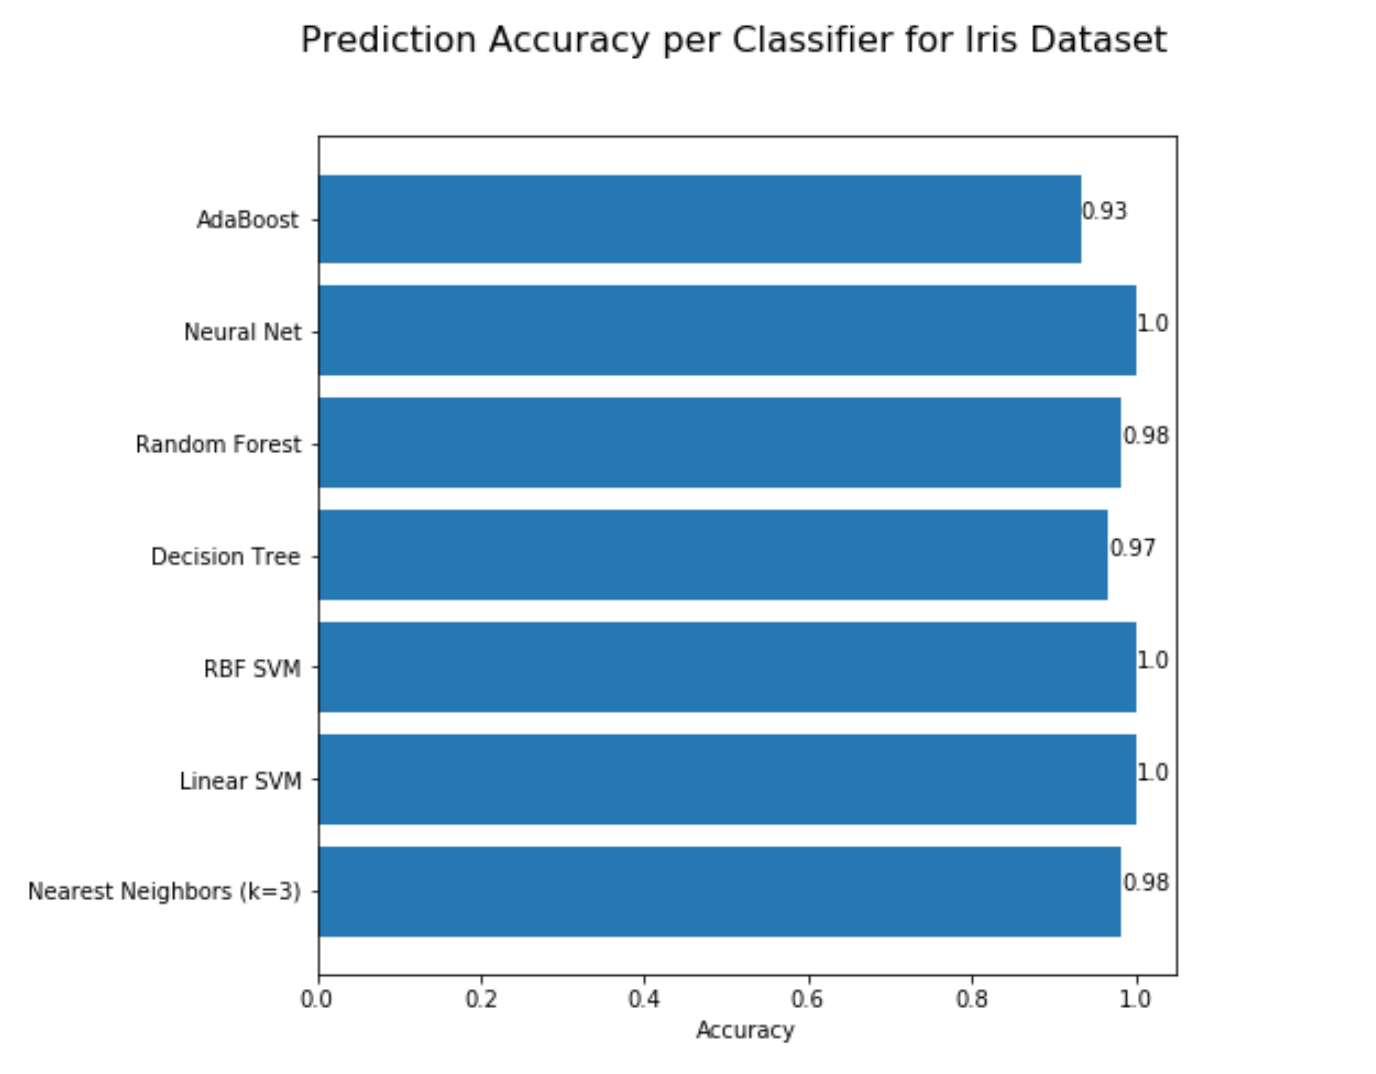

From here, we see that the Neural Net, Linear SVM and RBF SVM classifiers outperform all others in this task with 100% accuracy, followed by the 3-Nearest Neighbors and Random Forest classifiers at 98%, the Decision Tree classifier at 97%, and the AdaBoost classifier tailing behind at 93%, a whole 4 percentage points behind the classifier with the second worse performance. As we see later upon training these classifiers on the Adult data set, we note that the classifiers that performed the best with this dataset & task (e.g., the RBF SVM and Linear SVM classifiers) ended up performing the worst in the classification task given by the Adult data set. Moreover, the classifier(s) performing the worst in this classification task (e.g., the AdaBoost classifier) ended up performing the best in the latter classification task, altogether suggesting that the differences in these classifiers make them fundamentally best-suited to "learn" from the unique features of the respective data sets they performed well with. 


**Question 3**. Play with the hyperparameters of each of the algorithms. Try to improve the accuracy on the test data. 

**Soln. 3**: The resulting performance accuracies measured for each classifier on the same task, training and testing set instance as used for Question 2 after adjusting their respective hyperparameters are demonstrated in the bar graph below. 
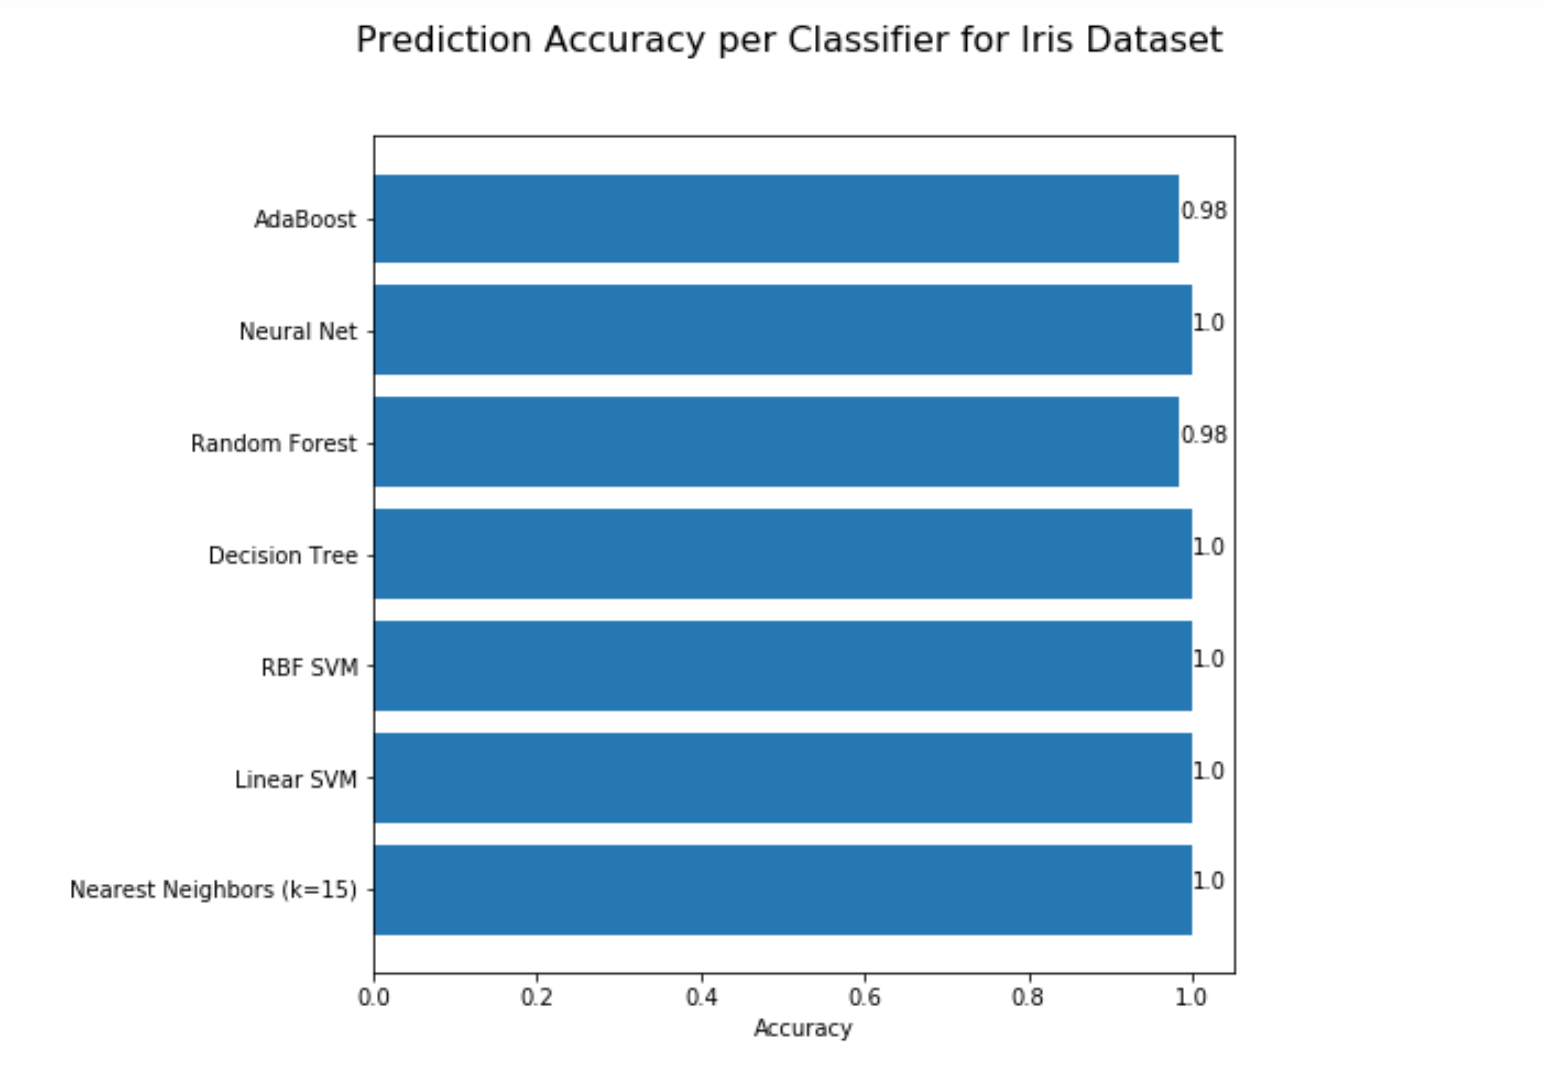
Recalling the conclusions from our previous assignment that involved running the kNN algorithm on the Iris data set, we note that adjusting the parameter k from k=3 to k=15 yielded a 100% performance accuracy from the Nearest Neighbors classifier on the same task instance. Moreover, borrowing the same methods used in another previous assignment involving the performance of gradient descent algorithms with respect to a variable learning rate, we have determined that the AdaBoost classifier appears to attain peak performance (at 98% accuracy) when the learning rate parameter has a magnitude of roughly $10^{-3}$ (the performance was consistent when setting the learning rate to 0.005, 0.0025, and 0.001). 

Upon reading the documentation for the Decision Tree classifier, we observed that increasing the minimum samples required for leaf nodes from a default of 1 to 3 was enough to bring its performance up to 100% accuracy for this task. On the other hand, we note that the exact same adjustment only brought the performance accuracy of our Random Forest classifier from 97% up to 98%; the same increase in performance was also made possible by increasing the max_features parameter from 1 to 2, but making both adjustments in tandem did not yield any better performance measures than what has already been obtained from either adjustment alone. 

**Question 4**. Perform the exploratory data analysis of  the Adult Data Set from http://archive.ics.uci.edu/ml/datasets/Adult. Train and estimate accuracy of all of all the classifiers from Question 1. Note that you will have to preprocess your data set before training. Explain all the preprocessing steps you applied and report on the accuracy on test data. Report all EDA and classification results in a 1-page document.


/Users/edenzackey/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


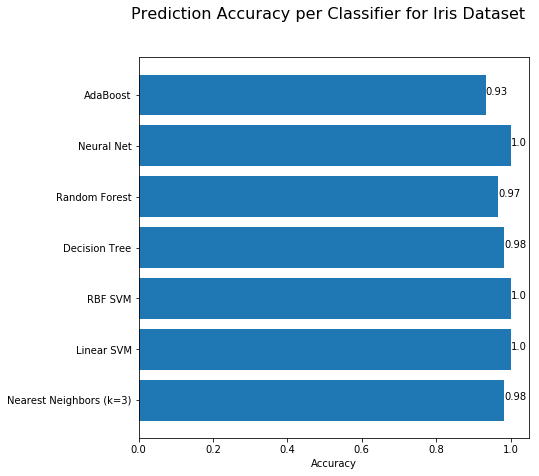

In [3]:
# Code for Question 2
from sklearn import datasets as D
from sklearn.model_selection import train_test_split

# load data
iris = D.load_iris()
X = iris.data
y = iris.target

names = ["Nearest Neighbors (k=3)", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]

# preprocess dataset, split into training and test part
#X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# iterate over classifiers
scores = [] # container for classifier accuracy
for clf in classifiers:
    clf.fit(X_train, y_train) # train classifier
    scores.append(clf.score(X_test, y_test)) # determine accuracy 

# plot results
plt.figure(figsize=(7, 7))
bars = plt.barh(names, scores) 
plt.xlabel('Accuracy')
plt.suptitle('Prediction Accuracy per Classifier for Iris Dataset', fontsize=16)

# label each bar with specific value 
i = 0
for bar in bars:
    w = bar.get_width()
    h = bar.get_y()+bar.get_height() /2
    plt.annotate(str(round(scores[i], 2)), xy=(w, h))
    i += 1

# show plot 
plt.show()    

/Users/edenzackey/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


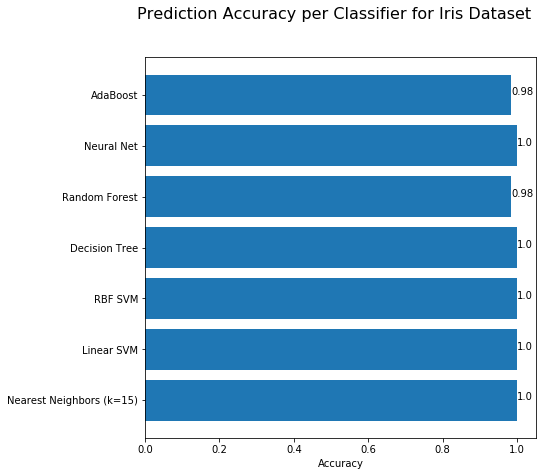

In [16]:
# Code for Question 3
k = 15
names = ["Nearest Neighbors (k="+str(k)+")", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]
classifiers = [
    KNeighborsClassifier(k),
    SVC(kernel="linear", C=0.05),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5, min_samples_leaf=3),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2, min_samples_leaf=3),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(learning_rate=0.001)]

# preprocess dataset, split into training and test part
#X = StandardScaler().fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# iterate over classifiers
scores = [] # container for classifier accuracy
for clf in classifiers:
    clf.fit(X_train, y_train) # train classifier
    scores.append(clf.score(X_test, y_test)) # determine accuracy 

# plot results
plt.figure(figsize=(7, 7))
bars = plt.barh(names, scores) 
plt.xlabel('Accuracy')
plt.suptitle('Prediction Accuracy per Classifier for Iris Dataset', fontsize=16)

# label each bar with specific value 
i = 0
for bar in bars:
    w = bar.get_width()
    h = bar.get_y()+bar.get_height() /2
    plt.annotate(str(round(scores[i], 2)), xy=(w, h))
    i += 1

# show plot 
plt.show()    

/Users/edenzackey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/edenzackey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/edenzackey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/edenzackey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rave

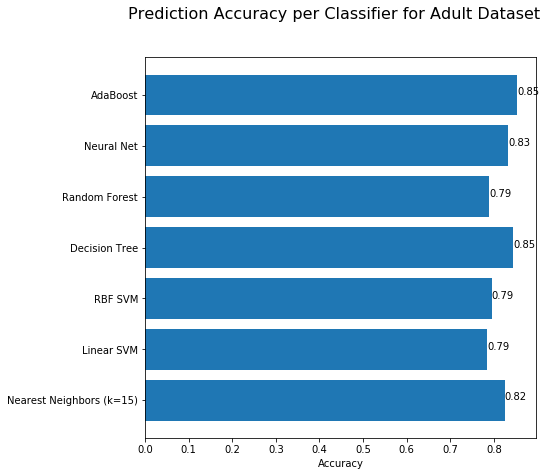

In [143]:
# code for question 4
import pandas as pd
from sklearn import preprocessing as pp
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

classifiers = [
    KNeighborsClassifier(k),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]

# load data
df = pd.read_csv("adult.data", na_values='?')

# preprocess data
    # set column names (from data documentation)
colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']
ex1 = df.columns # store first data entry (formerly used as column labels)
ex = pd.DataFrame(np.array([ex1]), columns=colnames) # convert entry to dataframe
df.columns = colnames # change column labels 
df=df.append(ex, ignore_index=True) # re-append first entry of data set
#df.reset_index()
#print(df) # validate correctness

    # format data sets for training & testing
X = df.take([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], axis=1).to_numpy(dtype=str, na_value=np.nan) # extract features
y = df.get('target').to_numpy(dtype=str) # extract target column
#print(X) # testing purposes 

    # encode ordinal attributes
enc = pp.OrdinalEncoder() # create encoder
X = enc.fit_transform(X) # encode X
y = enc.fit_transform(y.reshape(-1,1)) # encode y
#print(X) # testing purposes 
    
    # impute missing data
imp = IterativeImputer(random_state=0)
X = imp.fit_transform(X)

    # standardize X
X = StandardScaler().fit_transform(X)

    # split train & test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# iterate over classifiers
scores = [] # container for classifier accuracy
for clf in classifiers:
    clf.fit(X_train, y_train) # train classifier
    scores.append(clf.score(X_test, y_test)) # determine accuracy 

# plot results
plt.figure(figsize=(7, 7))
bars = plt.barh(names, scores) 
plt.xlabel('Accuracy')
plt.suptitle('Prediction Accuracy per Classifier for Adult Dataset', fontsize=16)

# label each bar with specific value 
i = 0
for bar in bars:
    w = bar.get_width()
    h = bar.get_y()+bar.get_height() /2
    plt.annotate(str(round(scores[i], 2)), xy=(w, h))
    i += 1

# show plot 
plt.show()    
